In [127]:
import numpy as np
import pandas as pd
import pdb

In [596]:
class LinearRegression():
    
    def __init__(self, fit_intercept=True, copy_X=True):
        self.params = {"fit_intercept" : fit_intercept, "copy_X" : copy_X}
        
    def fit(self, X, y, n_ite):
        """Fit model to training data"""
        n_samples = X.shape[0]
        n_features = X.shape[1]
        y=np.reshape(y, (-1,1))
        self.coef_ = np.zeros((n_features,1), dtype=float)
        self.intercept_ = 0
        
        if self.params['copy_X']:
            copy_x = np.copy(X)
            
        r=.0001
        batch_size=int(n_samples/100)
        
        i=0
        while i<n_ite:
            #r=float(r0/np.power(3,i))
            indices=np.random.randint(n_samples, size=batch_size)
            
            term1=y[indices]*copy_x[indices]
            term2=np.dot(copy_x[indices], self.coef_)*copy_x[indices]
            term3=self.intercept_*copy_x[indices]

            gradient_w=np.reshape(np.sum(2*(term1-term2-term3), axis=0), (n_features, 1))/n_samples
            #pdb.set_trace()

            coef_prev=self.coef_
            self.coef_=self.coef_ + r*gradient_w
            
            
            term1=y[indices]
            term2=np.dot(copy_x[indices], coef_prev)
            term3=self.intercept_

            gradient_b=np.sum(2*(term1-term2-term3))/n_samples

            intercept_prev=self.intercept_
            self.intercept_=self.intercept_ + r * gradient_b
            
            i+=1
        
        self.i_=i
        return self
    
    def predict(self, X):
        return np.dot(X, self.coef_)+self.intercept_
    
    def get_params(self):
        return self.params
    
    def score(self, X, y):
        """Calculate coefficient of determination R^2"""
        predictions = self.predict(X)
        u = np.sum((y-predictions)**2)
        mean=np.mean(y)
        v=np.sum((y-mean)**2)
        return 1-float(u/v)

In [437]:
from sklearn.datasets import load_boston
boston = load_boston()
import pandas as pd
bos = pd.DataFrame(boston.data)
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)


In [615]:
lm = LinearRegression()
lm.fit(X_train, Y_train, 150000)

Y_pred = lm.predict(X_test)

/home/vishal/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


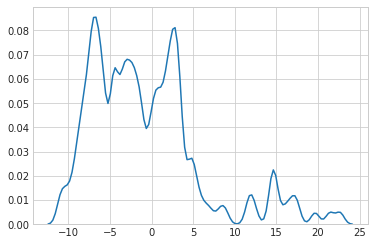

In [616]:
delta_y = np.array(Y_test) - Y_pred.ravel();

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

In [617]:
lm.score(X_test, np.reshape(Y_test, (-1,1)))

/home/vishal/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


0.49608642392756375

## Conclusion
Most of the errors are distributed around 0. R^2 score is close to 0.5 which is a good enough value